In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import powerlaw

%run backwards_time_voter_model.ipynb

In [43]:
# Define parameters as in paper
alpha = 3e-4
L = 500

In [44]:
grids = []
species_sizes = []

for i in range(1, 12):
    species_load = pickle.load(open(f"{500}x{500},alpha={alpha},kernel=nearest.p_{i}", "rb" ))
    for specie in species_load:
        species_sizes.append(len(specie))
    species_ids = np.random.uniform(size=len(species_load))
    print(len(species_load))

    grid = np.zeros((500, 500))
    for i, specie in enumerate(species_load):
        for coord in specie:
            grid[coord] = species_ids[i]
    grids.append(grid)

129
133
131
121
127
117
122
119
119
143
125


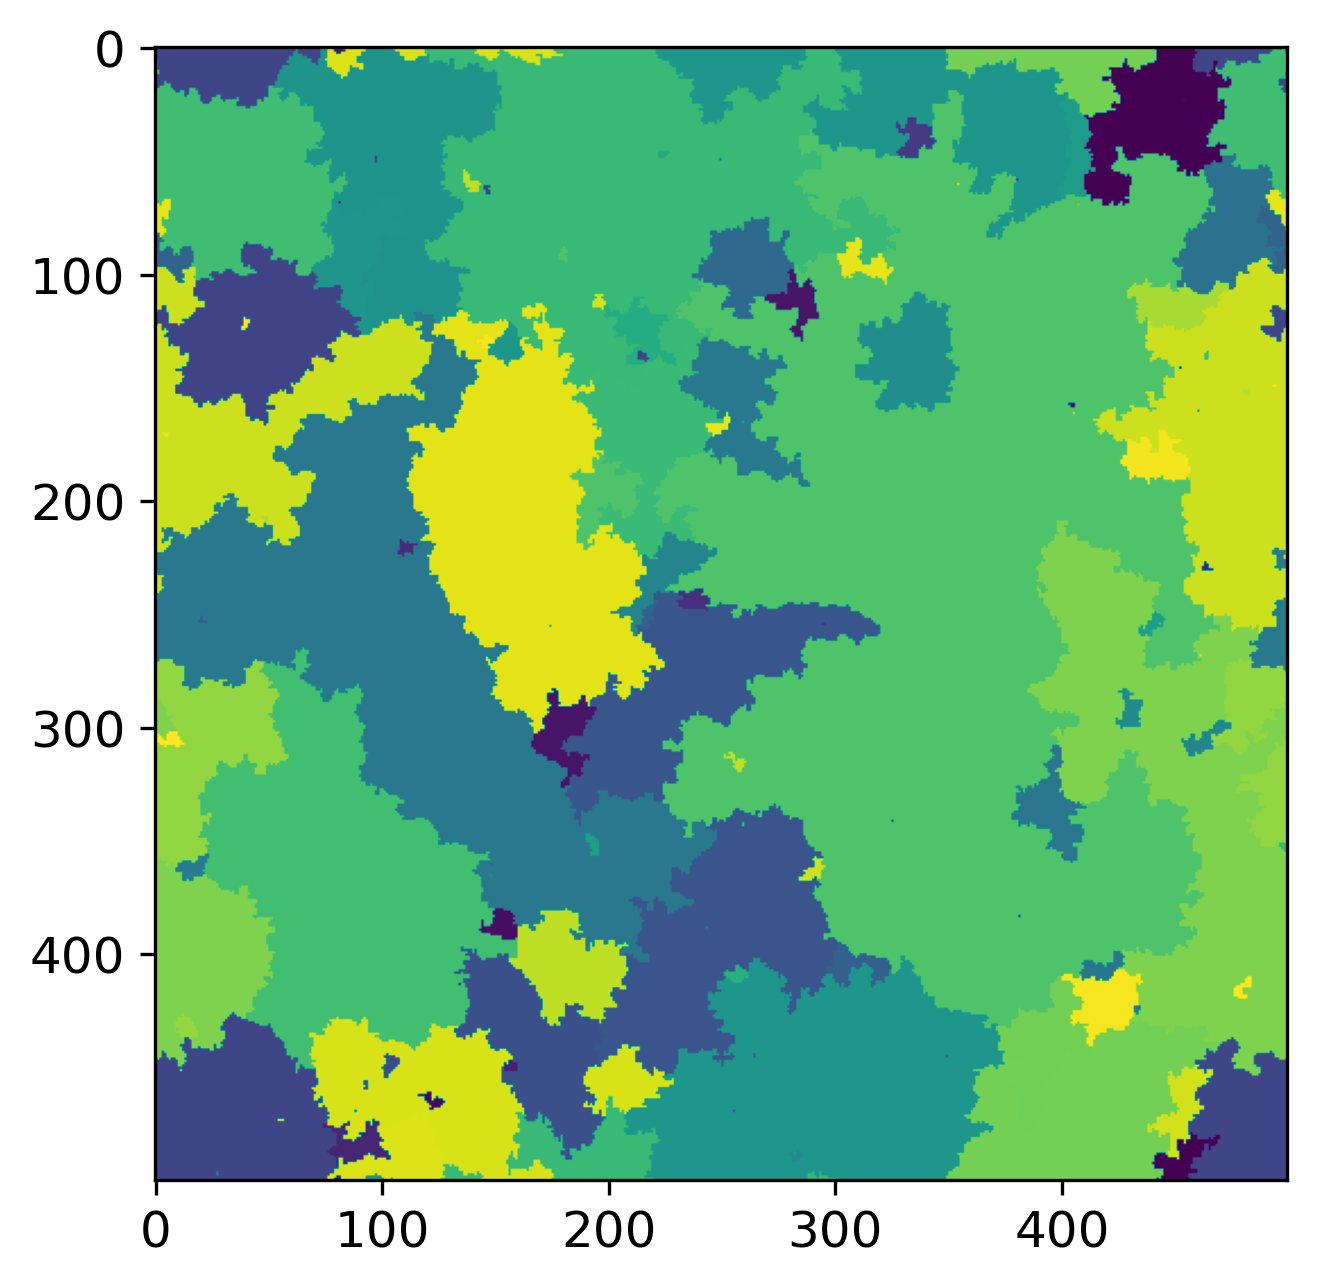

In [45]:
plt.figure(figsize=(5, 5))
plt.imshow(grid)
plt.show()

In [46]:
n_centers = 10

areas = []
num_species = []

for grid in grids:
    areas, cur_num_species = sa_curve(grid, n_centers)
    num_species = num_species + cur_num_species
    
spec_std_dev = np.std(num_species, axis=0)
spec_mean = np.mean(num_species, axis=0)

0.1675689789901301 0.9093034394424675
0.8253230523252517 0.014481820949309426


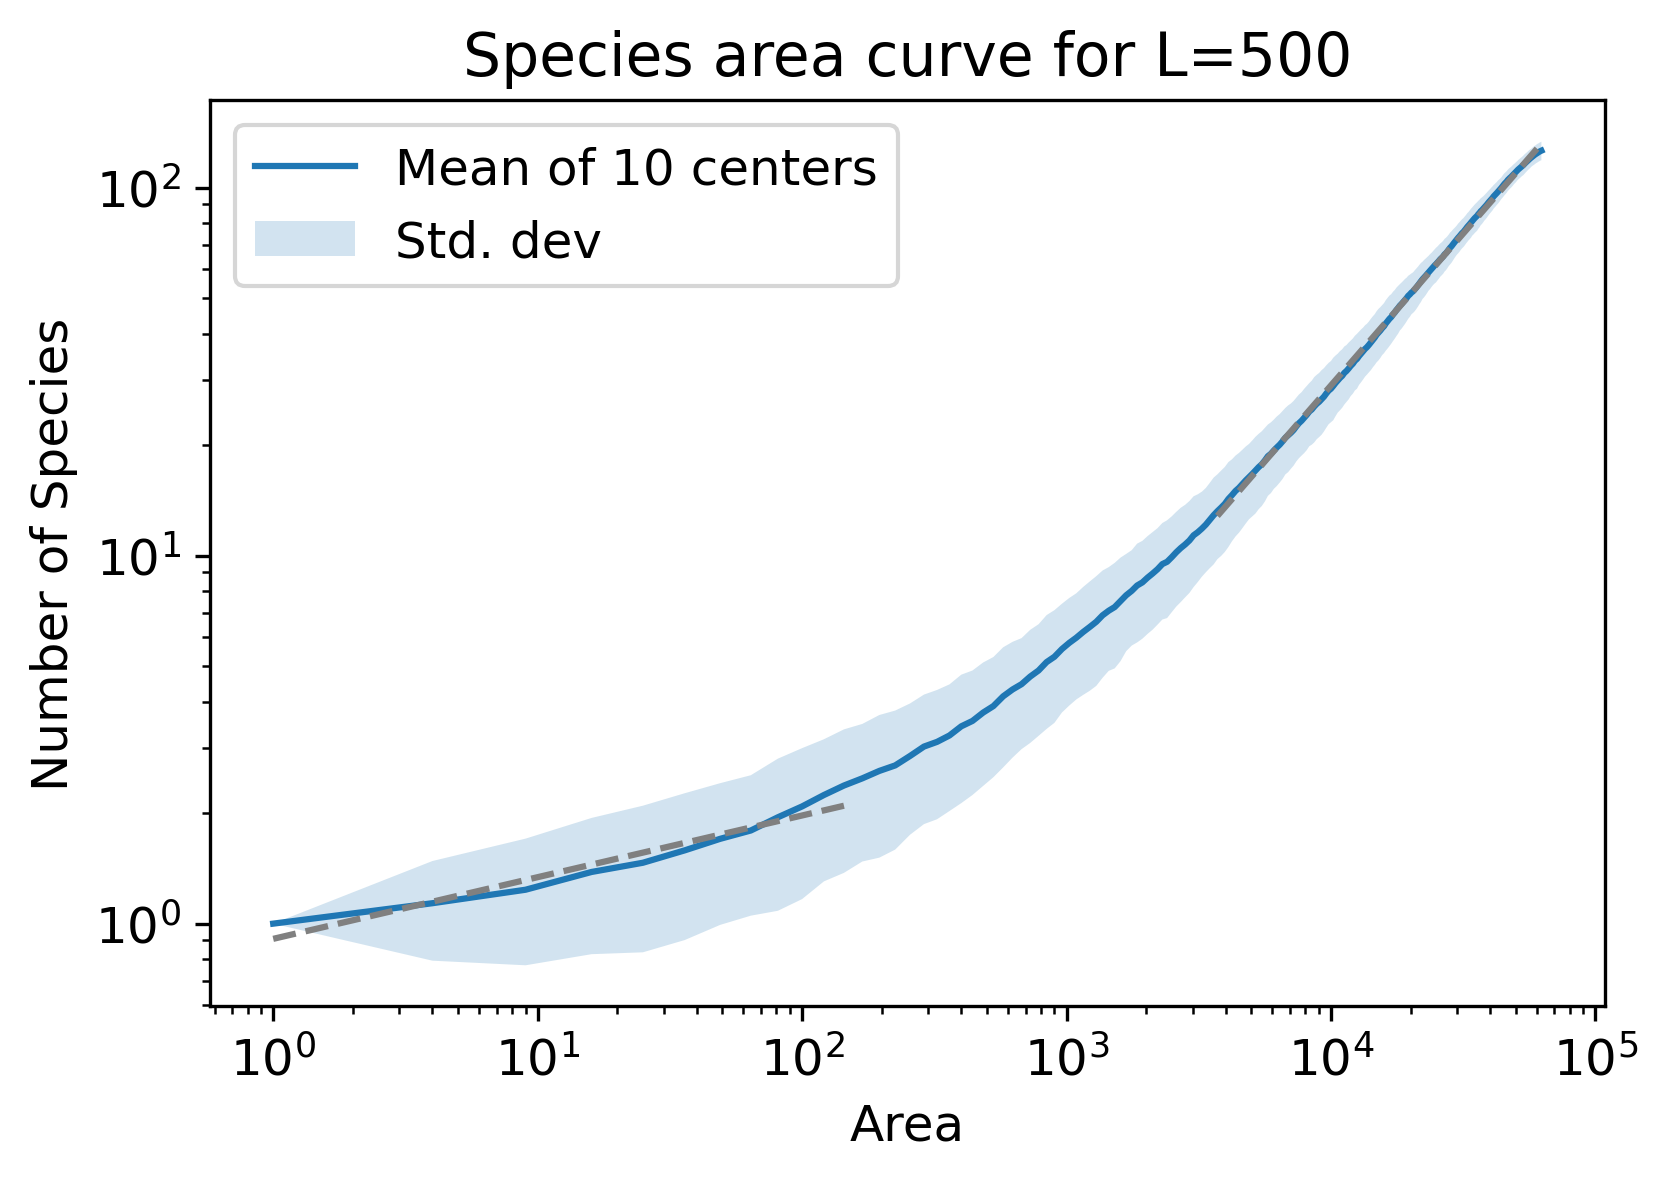

In [47]:
end_1 = 11
start_2 = 60
poly_coeffs_1 = np.polyfit(np.log(areas)[:end_1], np.log(spec_mean)[:end_1], 1)
poly_coeffs_2 = np.polyfit(np.log(areas)[start_2:], np.log(spec_mean)[start_2:], 1)

print(poly_coeffs_1[0], np.exp(poly_coeffs_1[1]))
print(poly_coeffs_2[0], np.exp(poly_coeffs_2[1]))

plt.loglog(areas, spec_mean, label='Mean of 10 centers')
plt.loglog([areas[0], areas[end_1]],
           np.exp(poly_coeffs_1[1])*np.array([areas[0], areas[end_1]])**poly_coeffs_1[0],
           linestyle='dashed',
           color='grey')

plt.loglog([areas[start_2], areas[-1]],
           np.exp(poly_coeffs_2[1])*np.array([areas[start_2], areas[-1]])**poly_coeffs_2[0],
           linestyle='dashed',
           color='grey')
plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label='Std. dev')
plt.ylabel('Number of Species')
plt.xlabel('Area')
plt.title(f'Species area curve for L={L}')
plt.legend()
plt.show()

In [48]:
print(np.linspace(1, np.log(max(species_sizes))))

[ 1.          1.2032019   1.40640381  1.60960571  1.81280761  2.01600952
  2.21921142  2.42241332  2.62561522  2.82881713  3.03201903  3.23522093
  3.43842284  3.64162474  3.84482664  4.04802855  4.25123045  4.45443235
  4.65763425  4.86083616  5.06403806  5.26723996  5.47044187  5.67364377
  5.87684567  6.08004758  6.28324948  6.48645138  6.68965328  6.89285519
  7.09605709  7.29925899  7.5024609   7.7056628   7.9088647   8.11206661
  8.31526851  8.51847041  8.72167232  8.92487422  9.12807612  9.33127802
  9.53447993  9.73768183  9.94088373 10.14408564 10.34728754 10.55048944
 10.75369135 10.95689325]


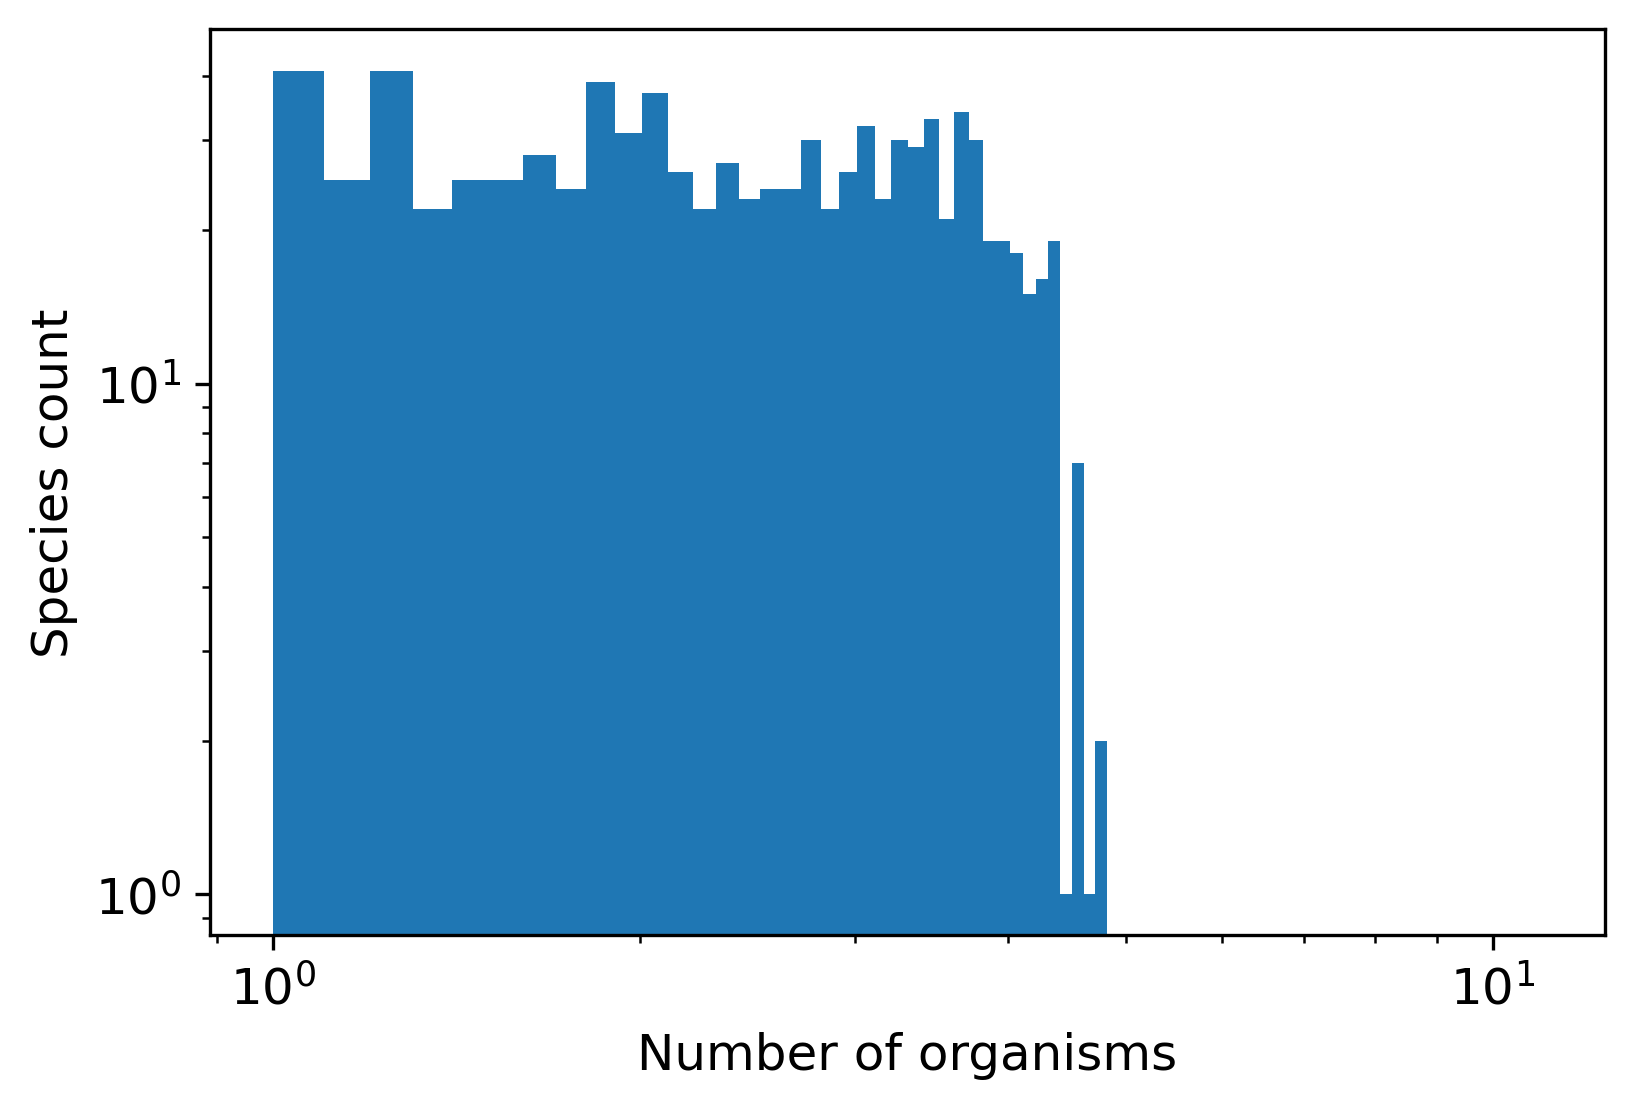

In [49]:
plt.hist(np.log10(species_sizes), bins=np.linspace(1, np.log(max(species_sizes)), 100), log=True)
plt.xlabel('Number of organisms')
plt.ylabel('Species count')
plt.xscale('log')
plt.show()

In [52]:
data = spec_mean[start_2:] # data can be list or numpy array
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit
12.961540560217033
108.3


In [53]:
print(areas[start_2:])

[3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801, 10000, 10201, 10404, 10609, 10816, 11025, 11236, 11449, 11664, 11881, 12100, 12321, 12544, 12769, 12996, 13225, 13456, 13689, 13924, 14161, 14400, 14641, 14884, 15129, 15376, 15625, 15876, 16129, 16384, 16641, 16900, 17161, 17424, 17689, 17956, 18225, 18496, 18769, 19044, 19321, 19600, 19881, 20164, 20449, 20736, 21025, 21316, 21609, 21904, 22201, 22500, 22801, 23104, 23409, 23716, 24025, 24336, 24649, 24964, 25281, 25600, 25921, 26244, 26569, 26896, 27225, 27556, 27889, 28224, 28561, 28900, 29241, 29584, 29929, 30276, 30625, 30976, 31329, 31684, 32041, 32400, 32761, 33124, 33489, 33856, 34225, 34596, 34969, 35344, 35721, 36100, 36481, 36864, 37249, 37636, 38025, 38416, 38809, 39204, 39601, 40000, 40401, 40804, 41209, 41616, 42025, 42436, 42849, 43264, 43